In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [389]:
#Importing the messy data set Shark Attack and generating a DataFrame
shark = pd.read_csv('https://raw.githubusercontent.com/ironhack-bcn-data-pt/PR02-project-pandas/master/data/GSAF5.csv', encoding = "ISO-8859-1")

In [390]:
#Previewing the data
shark.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [391]:
#Getting familiar with our variables
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [392]:
#when trying to access some of the columns we can see that several names contains whitespaces. We will clean that
new_columns = []
for i in shark.columns:
    i = i.strip()
    new_columns.append(i)

In [393]:
shark.columns = new_columns

In [394]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [395]:
#Getting a quick overview of the dataset
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [396]:
#we'll drop the rows where all elements are missing
shark = shark.dropna(how='all')

In [397]:
# Right away we see that the last 2 columns neither have specific names, nor have non-null observations. That is why 
#we will delete these 2 columns

shark = shark.drop(columns=['Unnamed: 22', 'Unnamed: 23'])
shark.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [398]:
#As we see there're only 13 observations out of 5992 when the values in 'Case Number.1' are not the same as in 
#'Case Number'
a1 = shark[shark['Case Number'] != shark['Case Number.1']]
a1[['Case Number','Case Number.1','Case Number.2']]

,Case Number,Case Number.1,Case Number.2
4,2016.09.15,2016.09.16,2016.09.15
33,2016.07.14.4,2016.07.14.R,2016.07.14.4
97,2016.01.24.b,2015.01.24.b,2016.01.24.b
116,2015.12.23,2015.11.07,2015.12.23
121,2015.10.28.a,2015.10.28,2015.10.28.a
169,2015.07-10,2015.07.10,2015.07.10
3296,1967.07.05,1967/07.05,1967.07.05
3569,"1962,08.30.b",1962.08.30.b,"1962,08.30.b"
3654,1961.09.02.R,"1961.09,06.R",1961.09.02.R
4177,1952.08.05,1952.08.04,1952.08.05


In [399]:
#and there're only 2 observations out of 5992 when the values in 'Case Number.2' are not equal to the ones in 'Case Number'
a2 = shark[shark['Case Number'] != shark['Case Number.2']]
a2[['Case Number','Case Number.1','Case Number.2']]

,Case Number,Case Number.1,Case Number.2
169,2015.07-10,2015.07.10,2015.07.10
4719,1934.01.08.R,1934.02.08.R,1934.02.08.R


In [400]:
#That is why we'll remove the columns 'Case Number.1' and 'Case Number.2'
#As well we'll drop the colunms 'pdf', 'href formula', 'href', 'original order' as they don't seem being any relevant 
#for our future analysis
shark = shark.drop(columns=['Case Number.1', 'Case Number.2', 'pdf', 'href formula', 'href', 'original order'])
shark.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [401]:
#dropping all possible duplicates
shark = shark.drop_duplicates()

In [402]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [403]:
#detecting the % of missing values per columns 
perc = round(100*shark.isnull().sum()/shark.shape[0], 2)
perc

Case Number                0.00
Date                       0.00
Year                       0.00
Type                       0.00
Country                    0.72
Area                       6.71
Location                   8.28
Activity                   8.80
Name                       3.34
Sex                        9.46
Age                       44.74
Injury                     0.45
Fatal (Y/N)                0.32
Time                      53.62
Species                   48.97
Investigator or Source     0.25
dtype: float64

In [404]:
#checking the unique values of the column 'Year'
shark['Year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897,
       1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886,
       1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877, 1876, 1875,
       1874, 1873, 1872, 1871, 1870, 1869, 1868, 18

In [405]:
#we'll be considering only the attacks happend in 1900 or later
shark = shark[shark['Year'] >= 1900]

<AxesSubplot:title={'center':'Shark Attacks per Year'}>

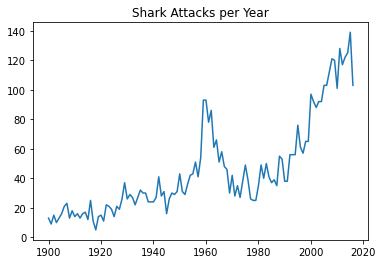

In [406]:
#let's build the graph of the shark attacks per year
shark['Year'].value_counts().sort_index().plot(title='Shark Attacks per Year')

<AxesSubplot:title={'center':'Countries with the most cases of Shark Attacks'}>

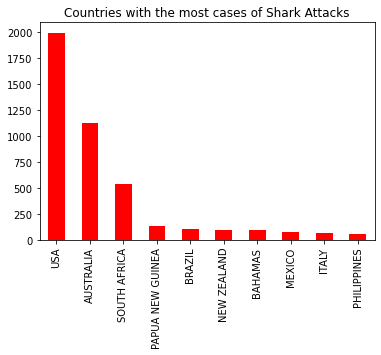

In [407]:
#10 countries with the most cases of Shark Attacks
shark['Country'].value_counts().head(10).plot.bar(color='red', title='Countries with the most cases of Shark Attacks')

In [408]:
#We'll now create a month column
shark['Month'] = shark['Case Number'].str.extract('\.([0-9]+)\.').dropna().astype(int)
shark['Month'].value_counts()

7.0     584
8.0     533
9.0     481
1.0     456
6.0     430
10.0    388
12.0    383
4.0     380
3.0     366
11.0    361
5.0     340
2.0     335
0.0     285
30.0      1
Name: Month, dtype: int64

In [409]:
#cleaning the 'Month' column
shark['Month'] = shark[(shark['Month']>=1) & (shark['Month']<=12)]['Month']

<AxesSubplot:title={'center':'Attacks per Month'}>

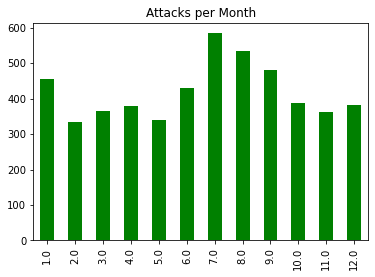

In [410]:
#As we can see the biggest number of attacks happened during summer.Most probably those cases are from USA. And the
#winter attacks are form Australia as Australian winter is form December to February.
shark['Month'].value_counts().sort_index(ascending=True).plot.bar(color='green', title='Attacks per Month')

In [411]:
#cleaning the 'Time' column
shark['New_Time'] = shark['Time'].str.extract('([0-9]+)').dropna().astype(int)
shark['New_Time']= shark[(shark['New_Time']>=0) & (shark['New_Time']<=24)]['New_Time']

<AxesSubplot:title={'center':'Shark Attacks during the Day'}, ylabel='Frequency'>

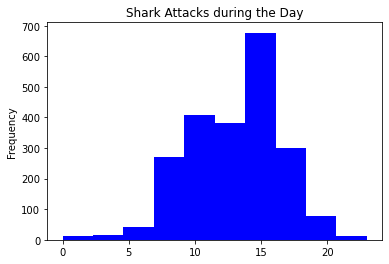

In [412]:
#As we can see the more attacks happened after lunch time than in the morning hours 
shark['New_Time'].plot(kind='hist', color='blue', title= "Shark Attacks during the Day")

In [413]:
shark['Name'].value_counts()

male                  391
female                 81
boy                    16
2 males                12
boat                   11
                     ... 
Dave Marcel             1
Josh Myers              1
5.4 m boat              1
10m boat Lucky Jim      1
 Toapindak (male)       1
Name: Name, Length: 4550, dtype: int64

In [414]:
shark['Sex'].value_counts()

M      4266
F       548
M         2
lli       1
N         1
.         1
Name: Sex, dtype: int64

In [415]:
shark['Sex'].unique()

array(['M', nan, 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [416]:
#cleaning the 'Sex' column
shark.replace(to_replace ='M ', value='M', inplace = True)
shark['Sex'].value_counts()

M      4268
F       548
lli       1
N         1
.         1
Name: Sex, dtype: int64

In [417]:
#we'll only be working with the 'Sex' values of 'M' and 'F'
shark[shark['Sex'].isin(['M','F'])]['Sex'].value_counts()

M    4268
F     548
Name: Sex, dtype: int64

In [418]:
#calculating the % of male and female victims of the shark attacks
perc2 = round(100*shark[shark['Sex'].isin(['M','F'])]['Sex'].value_counts()/shark[shark['Sex'].isin(['M','F'])]['Sex'].count(), 2)
perc2

M    88.62
F    11.38
Name: Sex, dtype: float64

<AxesSubplot:title={'center':'Gender of the Shark Attacks Victims, %'}>

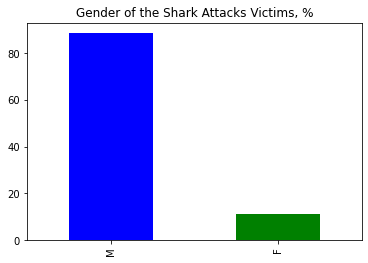

In [419]:
#as we can see the majority of the vistims are men
perc2.plot.bar(color= ['blue','green'], title= "Gender of the Shark Attacks Victims, %")

In [422]:
#we'll be cleaning the 'Age' column
shark['Age'].unique()

array(['16', '36', '43', nan, '60s', '51', '50', '12', '9', '22', '25',
       '37', '20', '49', '15', '21', '40', '72', '18', '29', '31', '11',
       '10', '59', '42', '34', '35', '19', '6', '27', '64', '60', '23',
       '52', '13', '57', '48', '39', '24', '26', '69', '46', 'Teen', '41',
       '45', '65', '38', '71', '32', '58', '28', '54', '44', '14', '7',
       '62', '40s', '68', '47', '17', '30', '63', '70', '18 months', '53',
       '20s', '33', '30s', '50s', '8', '61', '55', 'teen', '66', '77',
       '74', '3', '56', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '73', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
     

In [427]:
shark['New_Age'] = shark['Age'].str.extract('([0-9]+)').dropna().astype(int)

<AxesSubplot:title={'center':"Shark Attack Victim's Age"}>

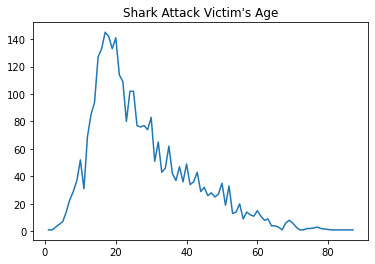

In [430]:
#as we can see the majority of victims are ypung people of 20-25 years of age
shark['New_Age'].value_counts().sort_index(ascending=True).plot(title="Shark Attack Victim's Age")

<AxesSubplot:title={'center':'Activity'}>

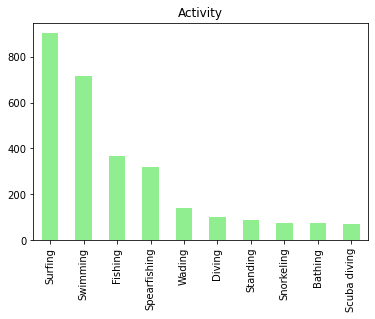

In [437]:
#the 10 most popular acrivities when being attacked by the shark
shark['Activity'].value_counts().head(10).plot.bar(color='lightgreen', title='Activity')

<AxesSubplot:title={'center':'The Most Dangerous Shark Species'}>

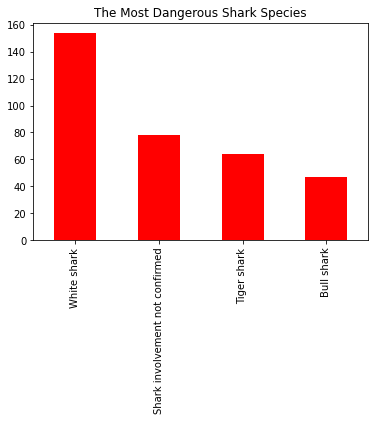

In [464]:
#the shark species that attack the most
shark['Species'].value_counts().head(4).plot.bar(color='red', title='The Most Dangerous Shark Species')

In [445]:
#we'll be cleaning the 'Fatal (Y/N)' column
shark['Fatal (Y/N)'].value_counts()

N          4027
Y          1202
UNKNOWN      76
 N            8
N             1
F             1
Name: Fatal (Y/N), dtype: int64

In [446]:
shark['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'UNKNOWN', ' N', 'F', 'N '], dtype=object)

In [448]:
shark.replace(to_replace ='N ', value='N', inplace = True)
shark.replace(to_replace =' N', value='N', inplace = True)
shark['Fatal (Y/N)'].value_counts()

N          4036
Y          1202
UNKNOWN      76
F             1
Name: Fatal (Y/N), dtype: int64

In [451]:
shark[shark['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()

N    4036
Y    1202
Name: Fatal (Y/N), dtype: int64

In [452]:
perc3 = round(100*shark[shark['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()/shark[shark['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].count(), 2)
perc3

N    77.05
Y    22.95
Name: Fatal (Y/N), dtype: float64

<AxesSubplot:title={'center':'Survived or Not Survived the Attack, %'}>

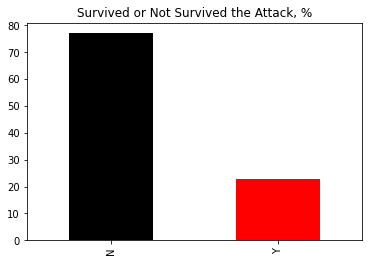

In [453]:
#there are more injured people than dead after attack
perc3.plot.bar(color= ['black','red'], title= "Survived or Not Survived the Attack, %")

In [463]:
##exporting the final 'Shark' DataFrame to csv file
shark.to_csv('shark_new.csv', index=False)